In [1]:
import math

import torch
import torch.nn as nn

class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

In [2]:
import matplotlib.pyplot as plt

# Assuming d_model is the dimensionality of the model
d_model = 64
max_len = 5000
batch_size = 32
seq_length = 50

# Initialize PositionalEmbedding with appropriate d_model and max_len
pos_embedding = PositionalEmbedding(d_model, max_len)

# Generate random input
x = torch.randn(batch_size, seq_length, d_model)

# Assuming the positional embedding has a 'pe' attribute with the positional encodings
# We get the positional embeddings for the first element in the batch for visualization.
# This is because visualizing a single sequence is clearer, and all sequences would have the same positional encodings.
pos_embeddings = pos_embedding.pe[:, :seq_length]

# Convert to numpy for visualization
pos_embeddings_np = pos_embeddings.detach().numpy()

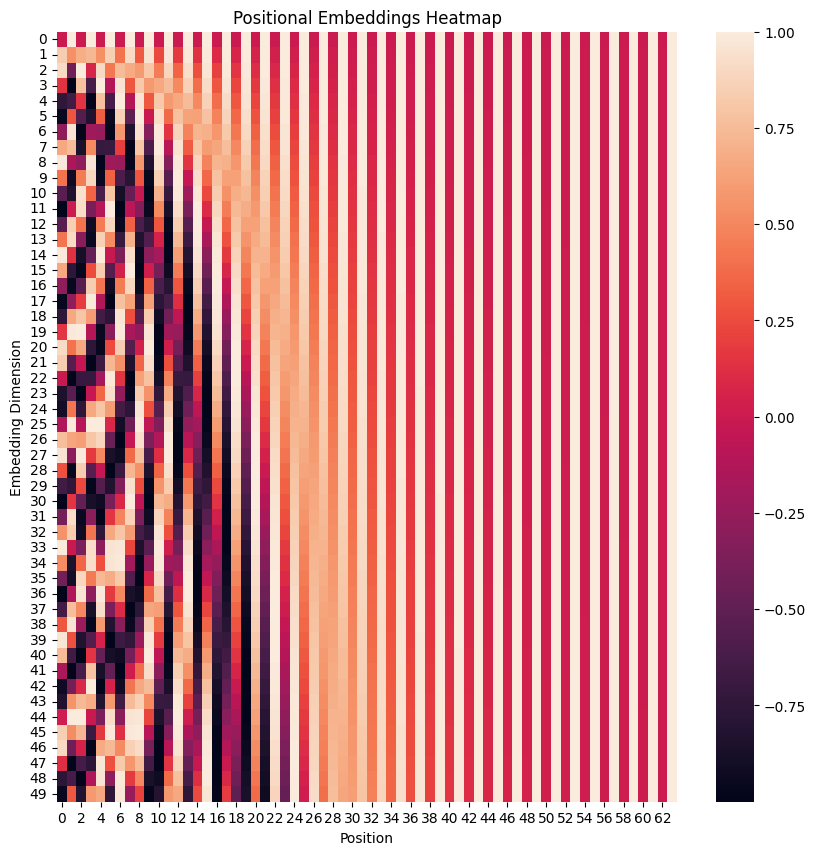

In [5]:
import seaborn as sns

# Assuming pos_embeddings_np is a numpy array with shape (50, 64) representing the positional embeddings

# Plot the heatmap with seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(pos_embeddings_np[0])
plt.title('Positional Embeddings Heatmap')
plt.xlabel('Position')
plt.ylabel('Embedding Dimension')
plt.show()
